# Simple Multi-Classification Using NN
we use here the datasets of sklearn (iris data) to test our network

import necessary modules

In [52]:
from sys import path
path.append('..')

from NN import NN
from Layer import Layer

from Encoder import Encoder

from sklearn.datasets import load_iris # multi-class
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

initialize the data

In [53]:
# set data
data = load_iris()
inputs = data.data
targets = data.target.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(inputs, targets, test_size=0.2)

###### we need to encode our target label

In [54]:
enc = Encoder()
Y_train_encoded = enc.encode(Y_train)
Y_test_encoded = enc.encode(Y_test)

print("Y_train: \n", Y_train[0:3,:])
print("Y_train after encoded: \n", Y_train_encoded[0:3,:])

Y_train: 
 [[2]
 [2]
 [2]]
Y_train after encoded: 
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


#### Create our network
+ set layers
+ set the neurons of each layer
+ set the activation function of each layer

In [64]:
# create the network
nn_model = NN(X_train, Y_train_encoded)
nn_model.add_layer( Layer(32, activation='sigmoid' ) )
nn_model.add_layer( Layer(10, activation='sigmoid') )

#### fit the model
Note: we are not using mini-batch, or stochastic

In [65]:
#fit the network
nn_model.fit(iteration=20000, learning_rate=0.001)

#### Plot the cost function on each 100 iteration

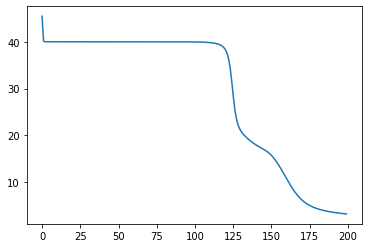

In [66]:
# plot cost function
plt.plot(nn_model._costs)
plt.show()

#### Predict some data


In [67]:
# predict some data
Y_train_pred = nn_model.predict(X_train)
Y_test_pred = nn_model.predict(X_test)
Y_train_pred[100:150,:]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

###### decoded our result

In [68]:
Y_train_pred = enc.decode(Y_train_pred)
Y_test_pred = enc.decode(Y_test_pred)
np.unique(Y_train_pred)

array([0., 1., 2.])

#### check the accuarcy of our model

In [69]:
print("score of train", accuracy_score(Y_train, Y_train_pred) )
print("score of test", accuracy_score(Y_test, Y_test_pred))

score of train 0.975
score of test 1.0


###### lucky shot
i'm not using softmax as output activation function, the sigmoid function is the activation of output
and i get a huge result, i wish all my days become like that :))